In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("NewData.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [3]:
df.head(10)

,Code,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1743,1,79,160,60.0,13.40,1,142,80,86,0,0,4.22,26.2,13.5,6.74,69.6,0.58,6.34,0
1,2100,1,81,153,38.0,16.20,0,132,74,69,0,0,6.27,19.9,16.2,3.70,51.6,0.88,4.96,0
2,3385,1,85,157,40.0,16.23,1,160,90,89,0,0,5.50,14.3,9.3,6.95,98.3,0.94,3.80,0
3,658,1,78,155,40.0,16.65,0,126,74,58,0,0,6.70,17.8,11.3,5.40,68.6,1.82,3.16,1
4,853,0,43,166,46.0,16.70,1,136,84,77,0,0,5.72,25.9,57.9,3.10,56.0,2.74,5.26,0
5,368,0,68,158,43.0,17.20,0,132,78,56,0,0,4.60,66.9,61.5,9.95,140.9,1.31,5.94,0
6,3076,0,76,170,50.0,17.30,1,150,90,70,0,0,4.69,15.1,13.9,7.44,104.4,2.71,5.21,0
7,2909,1,77,157,43.0,17.40,1,138,76,63,0,0,4.97,17.1,8.8,4.62,55.0,1.08,4.47,1
8,609,1,79,160,45.0,17.58,0,130,72,66,0,0,7.78,21.3,19.5,5.92,62.4,3.63,4.40,0
9,1151,1,83,160,45.0,17.60,1,150,90,66,0,0,5.29,20.1,16.2,5.83,91.2,4.07,4.17,0


In [4]:
df.columns

Index(['Code', 'Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Code,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
count,682.000000,682.00000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1582.914956,0.63783,66.412023,162.781525,63.495968,23.859106,0.653959,139.595308,83.341642,67.900293,0.027859,0.021994,6.050762,21.901510,21.373754,5.828021,67.579135,1.676041,5.070367,0.260997
std,954.723196,0.48098,10.061282,7.156777,9.653883,2.902418,0.476056,15.607724,9.043166,9.212870,0.164690,0.146772,1.563503,11.339964,16.113156,2.799483,30.909277,1.224666,5.131881,0.439501
min,4.000000,0.00000,17.000000,145.000000,38.000000,13.400000,0.000000,100.000000,62.000000,20.000000,0.000000,0.000000,2.400000,1.400000,4.300000,0.570000,5.850000,0.320000,1.920000,0.000000
25%,789.500000,0.00000,62.000000,158.000000,58.000000,22.000000,0.000000,130.000000,78.000000,62.000000,0.000000,0.000000,5.192500,16.800000,13.900000,4.720000,54.700000,0.940000,4.210000,0.000000
50%,1552.000000,1.00000,67.500000,162.000000,63.000000,23.700000,1.000000,136.000000,82.000000,68.000000,0.000000,0.000000,5.705000,20.000000,18.200000,5.525000,63.100000,1.330000,4.850000,0.000000
75%,2212.250000,1.00000,72.000000,168.000000,70.000000,25.600000,1.000000,150.000000,90.000000,73.000000,0.000000,0.000000,6.300000,24.075000,25.000000,6.520000,74.175000,1.960000,5.490000,1.000000
max,3391.000000,1.00000,91.000000,185.000000,110.000000,34.700000,1.000000,190.000000,135.000000,106.000000,1.000000,1.000000,18.800000,172.800000,262.000000,61.800000,682.500000,10.990000,136.400000,1.000000


In [6]:
#data = df.drop(columns = ['Unnamed: 19']).astype('float').values
data =df.values

In [7]:
data.shape

(682, 20)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
result_feature = scaler.fit_transform(data[:,:19])
result_label = data[:,19]

In [9]:
result = np.append(result_feature, result_label.reshape(len(result_label),1), axis = 1)

In [10]:
result.shape

(682, 20)

In [11]:
#df_newdata = pd.DataFrame(result, columns=df.drop(columns = ['Unnamed: 19']).columns)
df_newdata = pd.DataFrame(result, columns= df.columns)

In [12]:
df_newdata

,Code,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,0.513434,1.0,0.837838,0.375,0.305556,0.000000,1.0,0.466667,0.246575,0.767442,0.0,0.0,0.110976,0.144691,0.035700,0.100768,0.094214,0.024367,0.032867,0.0
1,0.618837,1.0,0.864865,0.200,0.000000,0.131455,0.0,0.355556,0.164384,0.569767,0.0,0.0,0.235976,0.107935,0.046178,0.051119,0.067613,0.052484,0.022606,0.0
2,0.998229,1.0,0.918919,0.300,0.027778,0.132864,1.0,0.666667,0.383562,0.802326,0.0,0.0,0.189024,0.075263,0.019402,0.104197,0.136629,0.058107,0.013980,0.0
3,0.193091,1.0,0.824324,0.250,0.027778,0.152582,0.0,0.288889,0.164384,0.441860,0.0,0.0,0.262195,0.095683,0.027163,0.078883,0.092736,0.140581,0.009221,1.0
4,0.250664,0.0,0.351351,0.525,0.111111,0.154930,1.0,0.400000,0.301370,0.662791,0.0,0.0,0.202439,0.142940,0.207994,0.041320,0.074115,0.226804,0.024836,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.166519,0.0,0.824324,0.300,0.583333,0.894836,1.0,0.600000,0.410959,0.476744,0.0,0.0,0.274390,0.103267,0.069461,0.079863,0.135447,0.114339,0.020003,1.0
678,0.013877,1.0,0.378378,0.300,0.583333,0.896714,0.0,0.400000,0.273973,0.627907,0.0,0.0,0.164634,0.001750,0.008149,0.067287,0.066135,0.030928,0.011823,0.0
679,0.992028,0.0,0.608108,0.500,0.722222,0.923005,0.0,0.400000,0.273973,0.558140,0.0,0.0,0.426829,0.068845,0.043461,0.126082,0.174906,0.179944,0.017252,1.0
680,0.359906,1.0,0.729730,0.300,0.625000,0.953052,0.0,0.333333,0.246575,0.546512,0.0,0.0,0.209146,0.108518,0.035312,0.083946,0.094066,0.054358,0.019259,1.0


In [13]:
df_newdata.columns

Index(['Code', 'Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC', 'Outcome'],
      dtype='object')

In [14]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']

In [15]:
X.shape

(682, 18)

In [16]:
X

array([[  1.  ,  79.  , 160.  , ...,  69.6 ,   0.58,   6.34],
       [  1.  ,  81.  , 153.  , ...,  51.6 ,   0.88,   4.96],
       [  1.  ,  85.  , 157.  , ...,  98.3 ,   0.94,   3.8 ],
       ...,
       [  0.  ,  62.  , 165.  , ..., 124.2 ,   2.24,   4.24],
       [  1.  ,  71.  , 157.  , ...,  69.5 ,   0.9 ,   4.51],
       [  0.  ,  68.  , 178.  , ...,  52.8 ,   2.68,   4.29]])

In [17]:
Y.shape

(682,)

In [18]:
#n_estimators为森林中树木数量，max_depth树的最大深度
#进行交叉验证，训练集和测试集为7:3的比例进行分配，
#ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
rf = RandomForestClassifier(n_estimators=20, max_depth=4)

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))


[0.85507246 0.8115942  0.85507246 0.88405797 0.88405797 0.89855072
 0.84057971 0.91304348 0.86956522 0.86956522]
0.8681159420289856


In [19]:

from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier()

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.84057971 0.85507246 0.88405797 0.86956522 0.8115942  0.84057971
 0.82608696 0.89855072 0.8115942  0.79710145]
0.8434782608695652


In [20]:
from sklearn.svm import SVC
rf = SVC()

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.79710145 0.75362319 0.76811594 0.75362319 0.76811594 0.72463768
 0.75362319 0.7826087  0.72463768 0.8115942 ]
0.7637681159420289


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

score = 'f1'

param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':[0.1],
        #'subsample':np.linspace(0.7,0.9,20),
        #'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1),
         'gpu_id':[0],
        'tree_method':['gpu_hist']
        }

clf = GridSearchCV(XGBClassifier(), param_dist, cv=ShuffleSplit(10, test_size = .1, train_size = .9), scoring='%s_macro' % score, n_jobs= -1)

clf.fit(X, Y)

print(clf.best_params_)

In [26]:
from xgboost import XGBClassifier
from xgboost import plot_importance

rf = XGBClassifier(learning_rate=0.1,
                      n_estimators=35,           # 树的个数-10棵树建立xgboost
                      max_depth=6,               # 树的深度
                      #max_feature=5,
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.0001,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      #random_state=27,           # 随机数
                      #slient = 0,
#                      gpu_id= 0,
#                      tree_method= 'gpu_hist')
                  )
#rf = XGBClassifier(gpu_id= 0, tree_method= 'gpu_hist')

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 2)
print(score)
print(sum(score)/len(score))

[0.86956522 0.85507246 0.82608696 0.88405797 0.84057971 0.88405797
 0.85507246 0.85507246 0.85507246 0.85507246]
0.8579710144927537


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/wsl2forwin/.pyenv/versions/3.8.11/li

[21:31:18] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_btree", "max_feature" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:31:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:33] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_btree", "max_feature" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any 

/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/wsl2forwin/.pyenv/versions/3.8.11/li

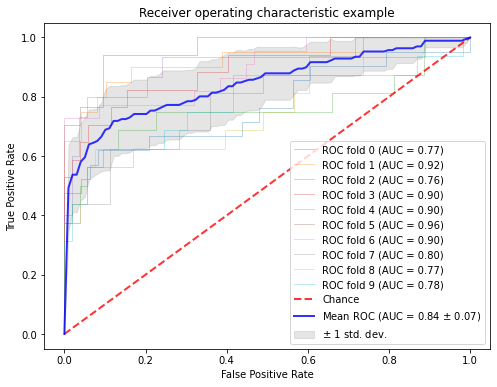

In [47]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = svm.SVC()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

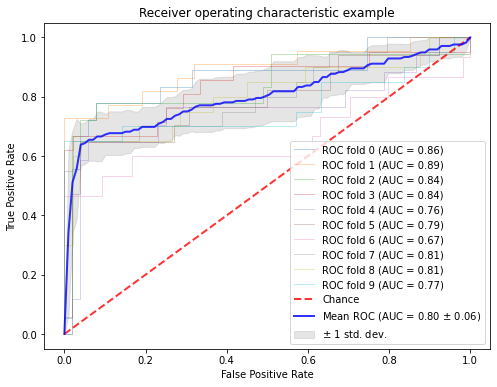

In [48]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = RandomForestClassifier(n_estimators=20, max_depth=4)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

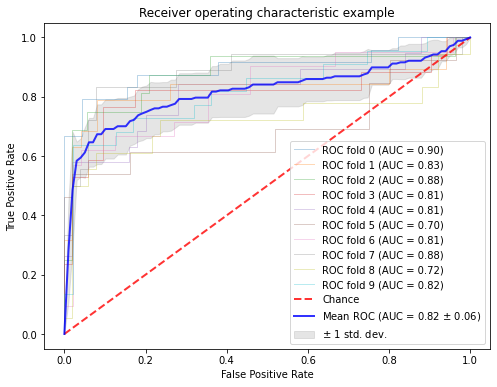

In [49]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = GradientBoostingClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/

[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/

[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fornpm/.pyenv/versions/3.6.13/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


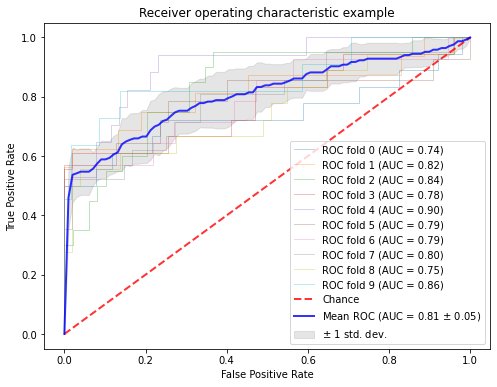

In [50]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = XGBClassifier()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()